# EDA Iris DataSet


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
### Cargar DataSet Iris de sklearn
iris = datasets.load_iris()

In [8]:
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

### solo para los dataset de SKlearn
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [11]:
### Conocer tipo de variable en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    float64 
 5   species            150 non-null    category
dtypes: category(1), float64(5)
memory usage: 6.3 KB


In [12]:
### Resumen estadístico
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
### Contar valores nulos de cada columna
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [15]:
### Conocer las dimensiones del DF
df.shape

(150, 6)

In [16]:
### Contar duplicados
df.duplicated().sum()

1

In [18]:
### buscar los duplicados
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
142,5.8,2.7,5.1,1.9,2.0,virginica


In [19]:
### Contar valores de la columna 'species'
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:title={'center':'Species Count'}, xlabel='species', ylabel='count'>

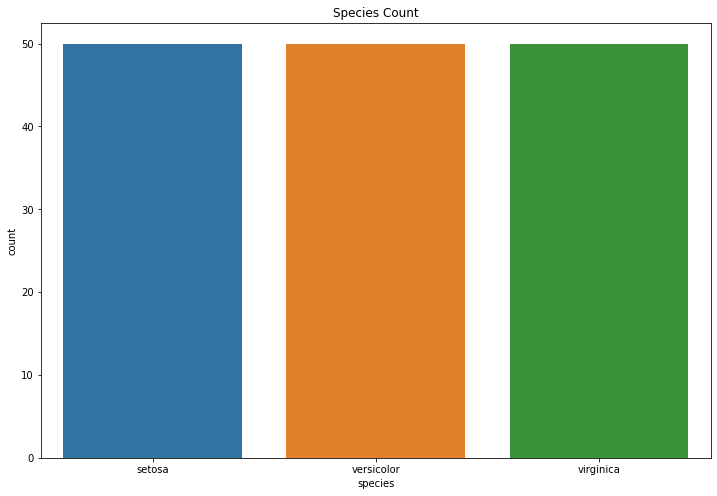

In [20]:
### Creamos un plot para saber cuantos valores hay de cada especie
plt.figure(figsize= (12,8))
plt.title('Species Count')
sns.countplot(x = 'species', data = df)

C:\Users\nmarq\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nmarq\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nmarq\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

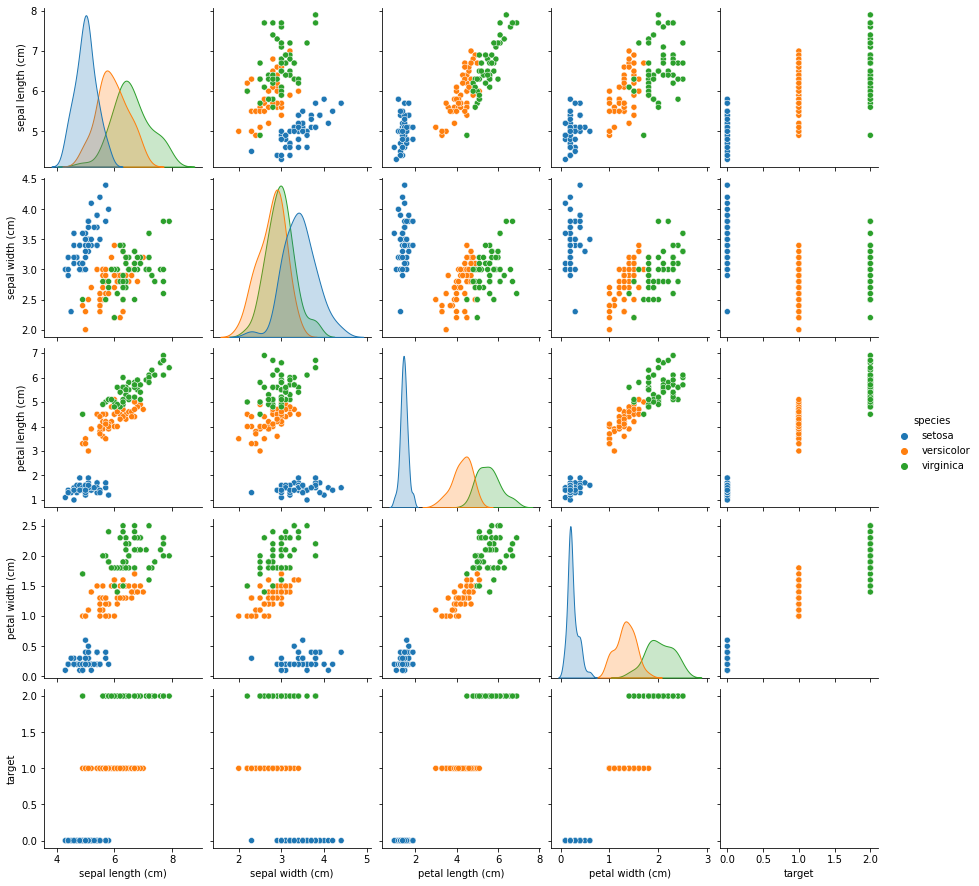

In [22]:
### Creamos un pairplot para visualizar la correlación entre variables
plt.figure(figsize = (12,8))
sns.pairplot(df, hue='species')

<AxesSubplot:>

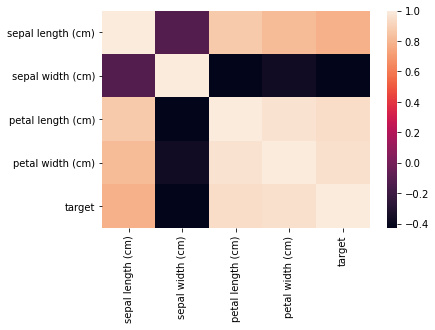

In [23]:
### Creamos un heatmap para visualizar la correlación como un diagrama de calor
sns.heatmap(df.corr())

In [24]:
### Nombre de las columnas
df.columns.unique()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

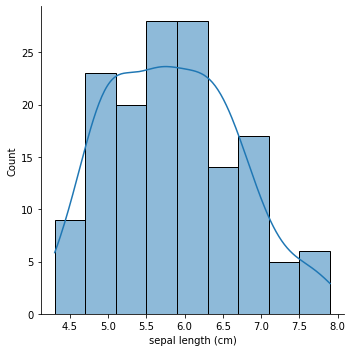

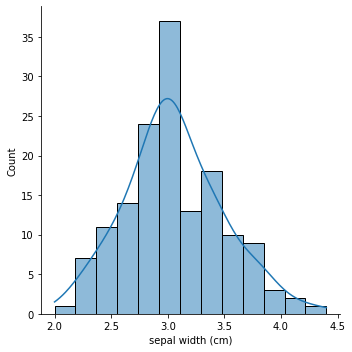

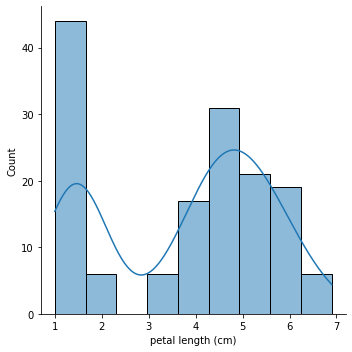

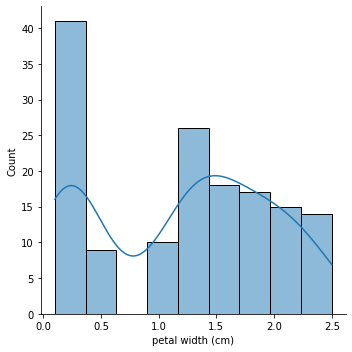

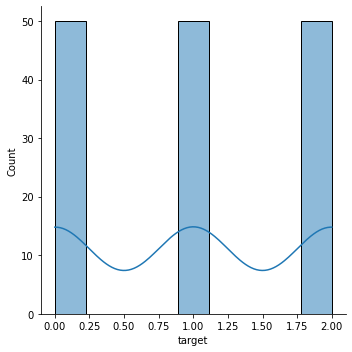

In [25]:
### Grafico para cada columna en especial, a excepción de la columna especies (ya sabemos que son 3 especies)
for column_name in df.columns.unique():
    if column_name != 'species':
        sns.displot(df[column_name], kde = True)

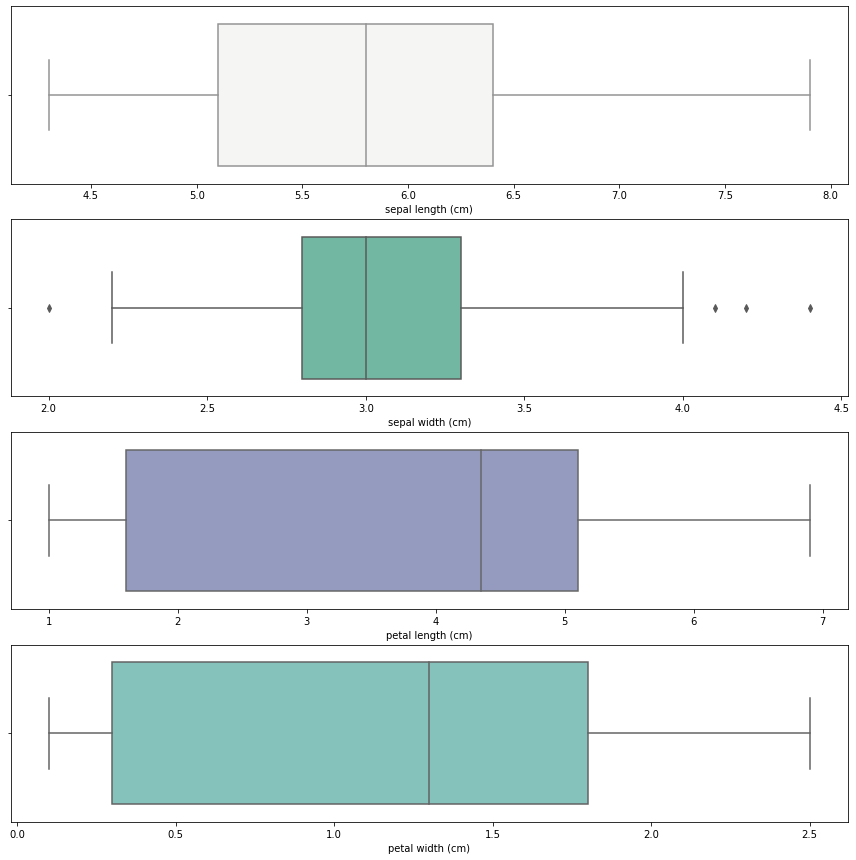

In [26]:
### Definimos los colores de las paletas
colors = ['BrBG_r', 'BuGn_r', 'BuPu_r', 'GnBu_r']
i = 0 

### Creamos un diagrama de cajas para cada columna para ver la distribución y outliers de los datos de esa columna
f, axes = plt.subplots(4, figsize = (15,15))
for col, color in zip(df.columns.unique(), colors):
    if col != 'species':
        sns.boxplot(x = col, data = df, ax = axes[i], palette = color)
        i = i+1

IndexError: index 4 is out of bounds for axis 0 with size 4

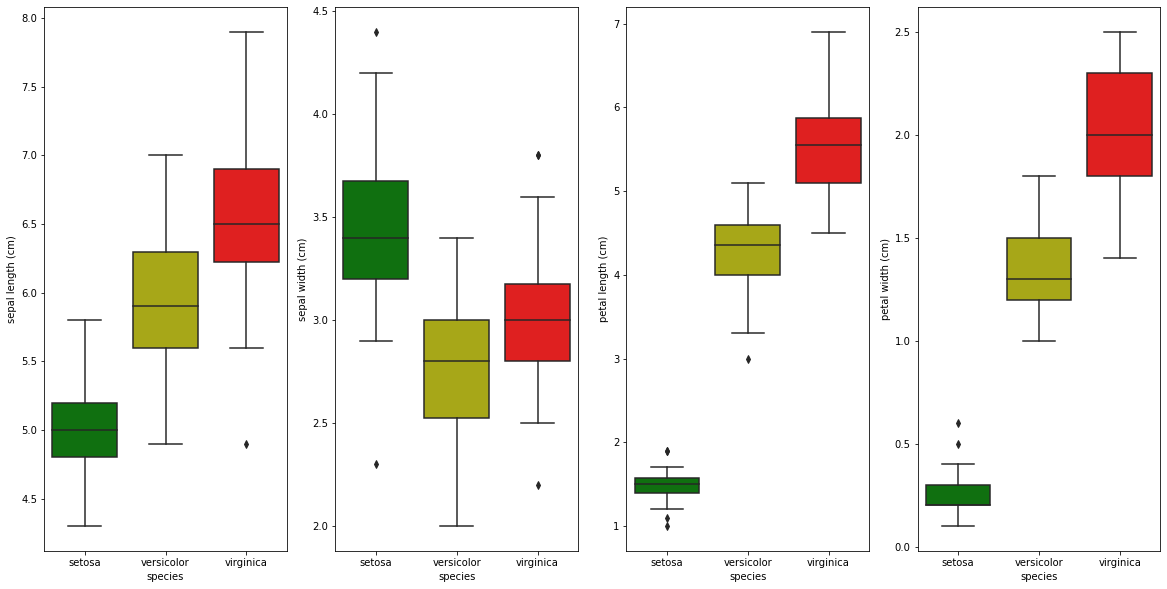

In [28]:
### Para cada especie creamos un boxplot según las caracteristicas en común
my_pal = {"versicolor": "y", "setosa":"g", "virginica":"r"}
i = 0
f, axes = plt.subplots(1,4, figsize = (20,10))
for col in df.columns.unique():
    if col != 'species':
        sns.boxplot(x = 'species', y = col, data = df, ax = axes[i], palette = my_pal)
        i = i + 1

In [30]:
### Seleccionamos la especie 'setosa' y luego buscamos el valor del quartil 97
setosa_df = df[df['species'] == 'setosa']
setosa_df['petal length (cm)'].quantile(0.97)

1.806

In [31]:
### Lo mismo pero con el quartil 3
setosa_df['petal length (cm)'].quantile(0.03)

1.147

In [33]:
### Buscamos outliers para la especie 'setosa'
### Buscamos los que esten fuera de los quartiles de la izquierda y derecha
### Creamos el dataframe con df[df[outliers]]

df[(df['species'] == 'setosa')&(df['petal length (cm)']>setosa_df['petal length (cm)'].quantile(0.97))|(df['petal length (cm)']<setosa_df['petal length (cm)'].quantile(0.03))]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
13,4.3,3.0,1.1,0.1,0.0,setosa
22,4.6,3.6,1.0,0.2,0.0,setosa
24,4.8,3.4,1.9,0.2,0.0,setosa
44,5.1,3.8,1.9,0.4,0.0,setosa


In [34]:
### Eliminamos los valores de los outliers que encontramos y mostramos los primeros 15 datos del dataset
df.drop(index = [13,22,24,44]).head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa
